# Convolutional Neural Networks without framework

In [12]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Zero padding

In [18]:
def zero_pad(X, pad):
    """
    Arguments:
    X - data type is numpy array, shape (m, H, W, C)
    pad - data type is integer, amount of padding around each image on vertical and horizontal
    """
    padded_X = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), "constant", constant_values=0)
    return padded_X

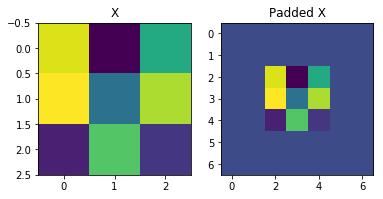

In [19]:
np.random.seed(1)
m = 4 # Number of sample
H = 3 # Height
W = 3 # Width
C = 2 # Channel

X = np.random.randn(m, H, W, C)
padded_X = zero_pad(X, 2)

fig, axes = plt.subplots(1, 2)
axes[0].set_title("X")
axes[0].imshow(X[0, :, :, 0])
axes[1].set_title("Padded X")
axes[1].imshow(padded_X[0, :, :, 0])

## Single step of convolution

In [15]:
def single_step_conv(a_slice_prev, W, b):
    """
    Arguments:
    a_slice_prev - data type is numpy array, shape is (f, f, C_prev)
    W - data type is numpy array, Weights matrix, shape is (f, f, C_prev)
    b - data type is numpy array, bias matrix, shape is (1, 1, 1)
    
    Returns:
    Z - a scalar value, result of convolving the sliding window (W, b) on a slice x of he input data
    """
    
    single = np.multiply(a_slice_prev, W)
    Z = np.sum(single)
    Z = Z + float(b)
    return Z

In [20]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4 ,3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)
Z = single_step_conv(a_slice_prev, W, b)
print("Z = {}".format(Z))

Z = -6.999089450680221


## Convolutional Neural Networks forward propagation

$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor + 1 $

$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor + 1 $

$ n_C = \text{Number of filters used in the convolution} $

In [22]:
def conv_forward(A_prev, W, b, hyper_params):
    
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    (f, f, n_C_prev, n_C) = W.shape
    
    stride = hyper_params["stride"]
    pad = hyper_params["pad"]
    
    
    n_H = int((n_H_prev - f + 2 * pad) / stride) + 1
    n_W = int((n_W_prev - f + 2 * pad) / stride) + 1
    
    Z = np.zeros((m, n_H, n_W, n_C))
    
    padded_A_prev = zero_pad(A_prev, pad)
    
    for i in range(m):
        a_padded_prev = padded_A_prev[i]
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):
                    vert_start = h * stride
                    vert_end = h * stride + f
                    horiz_start = w * stride
                    horiz_end = w * stride + f
                    
                    a_slice_prev = a_padded_prev[vert_start:vert_end, horiz_start:horiz_end, :]
                    Z[i, h, w, c] = single_step_conv(a_slice_prev, W[:, :, :, c], b[:, :, :, c])
    
    cache = (A_prev, W, h, hyper_params)
    return Z, cache

In [28]:
np.random.randn(1)
A_prev = np.random.randn(10, 4, 4, 3)
W = np.random.randn(2, 2, 3, 8)
b = np.random.randn(1, 1, 1, 8)
hyper_params = {"pad": 2, "stride": 2}


Z, conv_cache = conv_forward(A_prev, W, b, hyper_params)
print("Z.shape = {}".format(Z.shape))
print("Z[4, 2, 1, :] = {}".format(Z[4, 2, 1, :]))

Z.shape = (10, 4, 4, 8)
Z[4, 2, 1, :] = [ 6.20396203  1.40739964 -0.2540086   5.07457347  4.20509532  3.2021913
 -4.21663378  6.5173316 ]
